In [82]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import openslide
from openslide import open_slide
from openslide.deepzoom import DeepZoomGenerator
import os
import cv2
import random
import pickle

#take each meg location in ihc and create the corresponsing 512x512 image in the HE
path = "/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs"
image = "bPMF-CALR"
ihc_slide = "b-PMF-2021-02-08-11-36-01-CALR"
he_slide = "b-PMF-CALR-2021-02-19-11-02-12"


pickle_file = image + ".p"

new_path = os.path.join(path, pickle_file)

with open(new_path, 'rb') as handle:
    dict = pickle.load(handle)

ndpi_image = "/well/rittscher/users/qdv200/MPN/HE-IHC-BMT"

ihc_img = open_slide(os.path.join(ndpi_image, ihc_slide + ".ndpi"))
#ihc_img.get_thumbnail((1000,1000))
he_img = open_slide(os.path.join(ndpi_image, he_slide + ".ndpi"))

#for each key in dictionary get the meg location and then the 512x512 image with the meg at the center

#make a directory is doesn't exist
if not os.path.exists(os.path.join(path, image, "ihc_img")):
    os.makedirs(os.path.join(path, image, "ihc_img"))
if not os.path.exists(os.path.join(path, image, "he_img")):
    os.makedirs(os.path.join(path, image, "he_img"))

#first get the ihc_img
for key in dict.keys():
    ihc = dict[key]['ihc']
    he = dict[key]['he']

    ihc_tl = (int(ihc[0] - 256), int(ihc[1] - 256))
    he_tl = (int(he[0] - 256), int(he[1] - 256))

    ihc_patch = ihc_img.read_region(ihc_tl, 0, (512,512))
    he_patch = he_img.read_region(he_tl, 0, (512,512))

    ihc_patch = np.array(ihc_patch)
    he_patch = np.array(he_patch)

    ihc_img_path = os.path.join(path, image, "ihc_img", image + "_" + str(key) + ".png")
    he_img_path = os.path.join(path, image, "he_img", image + "_" + str(key) + ".png")
    
    cv2.imwrite(ihc_img_path, ihc_patch)
    cv2.imwrite(he_img_path, he_patch)

#80 20 split for train and test

#list all files in the ihc_img folder
ihc_img_path = os.path.join(path, image, "ihc_img")
he_img_path = os.path.join(path, image, "he_img")

ihc_img_files = os.listdir(ihc_img_path)
he_img_files = os.listdir(he_img_path)

#randomly select 80% of the files for train and 20% for test
train_img_files = random.sample(ihc_img_files, int(len(ihc_img_files)*0.8))

#remove the train files from the list of all files to get the test files
test_img_files = [x for x in ihc_img_files if x not in train_img_files]

#move the train files to a new folder using python
train_ihc_img_path = os.path.join(path,  "ihc2he/trainA")  
train_he_img_path = os.path.join(path, "ihc2he/trainB")

test_ihc_img_path = os.path.join(path, "ihc2he/testA")
test_he_img_path = os.path.join(path, "ihc2he/testB")

for file in train_img_files:
    ihc_img = cv2.imread(os.path.join(ihc_img_path, file))
    he_img = cv2.imread(os.path.join(he_img_path, file))
    
    cv2.imwrite(os.path.join(train_ihc_img_path, file), ihc_img)
    cv2.imwrite(os.path.join(train_he_img_path, file), he_img)

for file in test_img_files:
    ihc_img = cv2.imread(os.path.join(ihc_img_path, file))
    he_img = cv2.imread(os.path.join(he_img_path, file))
    
    cv2.imwrite(os.path.join(test_ihc_img_path, file), ihc_img)
    cv2.imwrite(os.path.join(test_he_img_path, file), he_img)



In [83]:
#check for duplicates in test and train

train_ihc_img_files = os.listdir(train_ihc_img_path)
train_he_img_files = os.listdir(train_he_img_path)

test_ihc_img_files = os.listdir(test_ihc_img_path)
test_he_img_files = os.listdir(test_he_img_path)

#check if element appears twice in a list

def check_duplicates(list):
    for i in list:
        if list.count(i) > 1:
            print(i)    

check_duplicates(train_ihc_img_files)
check_duplicates(train_he_img_files)
check_duplicates(test_ihc_img_files)
check_duplicates(test_he_img_files)

#check that the same file is not in both train and test
for i in train_ihc_img_files:
    if i in test_ihc_img_files:
        print(i)




In [94]:
ihc_img_path

'/well/rittscher/users/qdv200/MPN/processed_CALR_IHC_megs/registered_CALR_segs/bPMF-CALR/ihc_img'

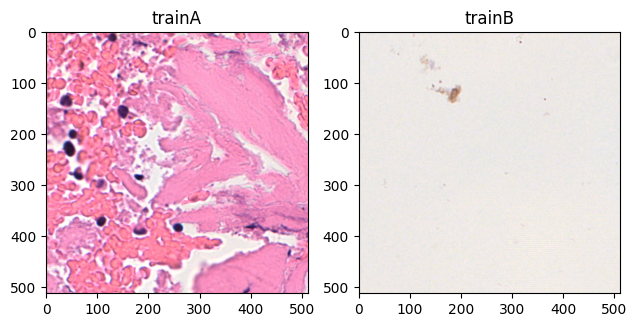

In [97]:
#double check these are actually megs

import matplotlib.pyplot as plt
import cv2
import os

i = "bPMF-CALR_1.png"

# Create subplots
fig, axs = plt.subplots(1, 2)
axs[0].imshow(cv2.imread(os.path.join(ihc_img_path, i)))
axs[0].set_title('trainA')
axs[1].imshow(cv2.imread(os.path.join(he_img_path, i)))
axs[1].set_title('trainB')

fig.tight_layout()
plt.show()

In [98]:
#check the pickle file is correct

import pickle

with open(new_path, 'rb') as handle:
    dict = pickle.load(handle)



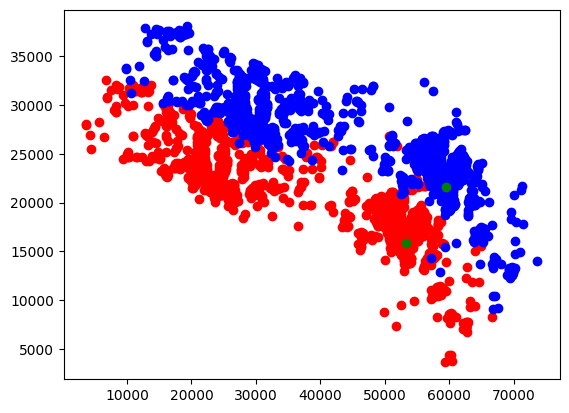

In [102]:
ihc_x =[]
ihc_y = []
he_x = []
he_y = []

for key in dict:
    ihc_x.append(dict[key]['ihc'][0])
    ihc_y.append(dict[key]['ihc'][1])
    he_x.append(dict[key]['he'][0])
    he_y.append(dict[key]['he'][1])

plt.scatter(ihc_x, ihc_y, c='r')
plt.scatter(he_x, he_y, c='b')
plt.scatter(he_x[10], he_y[10], c='g')
plt.scatter(ihc_x[10], ihc_y[10], c='g')
plt.show()


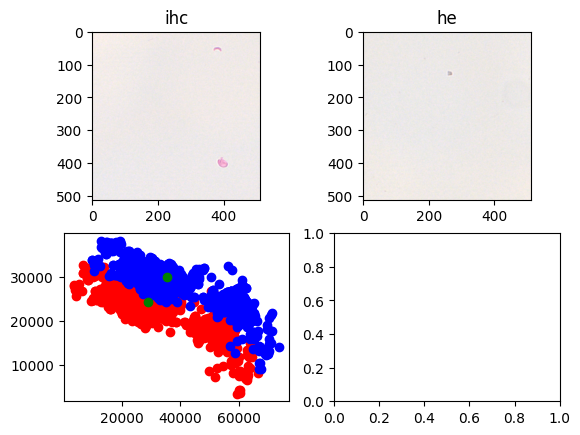

In [110]:
#check that the images are the same when I plot them alone

ihc_img = open_slide(os.path.join(ndpi_image, ihc_slide + ".ndpi"))
#ihc_img.get_thumbnail((1000,1000))
he_img = open_slide(os.path.join(ndpi_image, he_slide + ".ndpi"))

key = 20

ihc = dict[key]['ihc']
he = dict[key]['he']

ihc_tl = (int(ihc[0] - 256), int(ihc[1] - 256))
he_tl = (int(he[0] - 256), int(he[1] - 256))

ihc_patch = ihc_img.read_region(ihc_tl, 0, (512,512))
he_patch = he_img.read_region(he_tl, 0, (512,512))

ihc_patch = np.array(ihc_patch)
he_patch = np.array(he_patch)

#get ihc and he coords from dict


#show as subplots

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(ihc_patch)
axs[0, 0].set_title('ihc')
axs[0, 1].imshow(he_patch)
axs[0, 1].set_title('he')
axs[1, 0].scatter(ihc_x, ihc_y, c='r')
axs[1, 0].scatter(he_x, he_y, c='b')
axs[1, 0].scatter(he_x[key], he_y[key], c='g')
axs[1, 0].scatter(ihc_x[key], ihc_y[key], c='g')

plt.show()




# ihc_img_path = os.path.join(path, image, "ihc_img", image + "_" + str(key) + ".png")
# he_img_path = os.path.join(path, image, "he_img", image + "_" + str(key) + ".png")

# cv2.imwrite(ihc_img_path, ihc_patch)
# cv2.imwrite(he_img_path, he_patch)

In [ ]:
#overlay scatter on the images

